I want to make a model for a simple and somehow idealized crosstalk mechanism.

The following setup I have in mind:
 * random noise avalanches occur with a rate $R$, e.g. 4 MHz.
 * I look in a random time window of width $t_0$ for how many avalanches I see, e.g. 7ns.
 * If there was no crosstalk, the number of N "noise" avalanches I see in the window, 
    is simply given by the Poisson distribution:
    $P_{\mu}(N) = \frac{\mu^N}{N!} e^{-\mu}$
 * If there is 1 initial avalanche, the probability to get M (additional) crosstalk-avalanches is simply given by the geometrical distribution $P_p(M) = p^M \cdot (1-p)$.
 * $\mu$ is simply given by the rate and the integration time window: $\mu = R \cdot t_0$, e.g. $\mu = 0.07$.
 * $p$ should be interpreted as a **single-cell crosstalk probability** (SCCP), so the "microscopic image" I have in mind for this goes like this:
   * Exactly one initial avalanche occurs.
   * With some probability p it can trigger exactly one other cell.
   * With 1-p it does not trigger another cell.
   * If another cell is triggered, the game goes on...
   
 
In order to derive a nice and closed expression for the total number of avalanches $T$ we see in the integration windows as a function of only the accidental expectation value $\mu$ and the SCCP $p$, we need some preparations.

Assuming we have more than exactly 1 initial avalanches in our window, we call this number $N$. What is the distribution of additional avalanches $M$ due to crosstalk. Let us write down some examples:

 * $P_p(0 | 2) = (1-p)^2$ when we have two initials, we need two times $(1-p)$ to not get a single crosstalk.
 * $P_p(1 | 2) = (p^1 (1-p)^1) \cdot (1-p)^1 + (1-p)^1 \cdot (p^1(1-p)^1) = 2 \cdot p(1-p)^2$ 
    In order to see exactly 1 additional (crosstalk) avalanche, when we had 2 initial (noise) avalanches, either the 1st must make exactly one crosstalk and then fail to make another, and the 2nd must not make any crosstalk **OR** the other way round, so the 1st must not make any crosstalk, while the 2nd makes exactly 1 crottalk. 
    
With some mor examples and intuition we can write the probability to see exactly $M$ additional crosstalk avalanches, when one had $N$ noise avalanches as $P_p(M | N)$

$P_p(M | N) = \binom{M+N-1}{M} p^M (1-p)^N $

with $\binom{M+N-1}{M}$ being the binomial coefficient $\binom{M+N-1}{M}  =  \frac{(M+N-1)!}{M! \cdot (N-1)!}$.

Let us check if this is really a valid probability distribution. So it has to be normalized.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
from scipy.special import binom
def model(initial, additional, p=0.1):
        N = initial
        M = additional
        
        return binom((M+N-1), M) * p**M * (1-p)**N

In [3]:
max_additional=20
for i in range(1, 10):
    print('initial:{i}'.format(i=i))
    for p in [0., 0.1, 0.2, 0.5, 0.9, 1.]:
        s = 0 
        for a in range(max_additional):
            P = model(initial=1, additional=a)
            s += P
        print('    p:{p} -> 1-sum(max_additional={N}): {s}'.format(
            p=p,
            N=max_additional,
            s=1-s,
        ))

initial:1
    p:0.0 -> 1-sum(max_additional=20): 0.0
    p:0.1 -> 1-sum(max_additional=20): 0.0
    p:0.2 -> 1-sum(max_additional=20): 0.0
    p:0.5 -> 1-sum(max_additional=20): 0.0
    p:0.9 -> 1-sum(max_additional=20): 0.0
    p:1.0 -> 1-sum(max_additional=20): 0.0
initial:2
    p:0.0 -> 1-sum(max_additional=20): 0.0
    p:0.1 -> 1-sum(max_additional=20): 0.0
    p:0.2 -> 1-sum(max_additional=20): 0.0
    p:0.5 -> 1-sum(max_additional=20): 0.0
    p:0.9 -> 1-sum(max_additional=20): 0.0
    p:1.0 -> 1-sum(max_additional=20): 0.0
initial:3
    p:0.0 -> 1-sum(max_additional=20): 0.0
    p:0.1 -> 1-sum(max_additional=20): 0.0
    p:0.2 -> 1-sum(max_additional=20): 0.0
    p:0.5 -> 1-sum(max_additional=20): 0.0
    p:0.9 -> 1-sum(max_additional=20): 0.0
    p:1.0 -> 1-sum(max_additional=20): 0.0
initial:4
    p:0.0 -> 1-sum(max_additional=20): 0.0
    p:0.1 -> 1-sum(max_additional=20): 0.0
    p:0.2 -> 1-sum(max_additional=20): 0.0
    p:0.5 -> 1-sum(max_additional=20): 0.0
    p:0.9 -> 1

In [4]:
%matplotlib inline
from matplotlib.colors import LogNorm

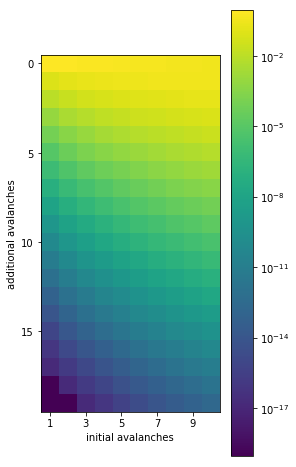

In [5]:
p = 0.1
P = np.zeros((20, 10))
for i in range(1, 11):
    for a in range(20):
        P[a, i-1] = model(initial=i, additional=a, p=p)
plt.matshow(
    P, 
    norm=LogNorm(),
)
plt.colorbar();
ax = plt.gca()
ax.xaxis.set_ticks_position('bottom');
plt.xticks(np.arange(0, 10, 2), np.arange(0, 10, 2)+1);
plt.xlabel('initial avalanches')
plt.ylabel('additional avalanches');

In [6]:
P.sum(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

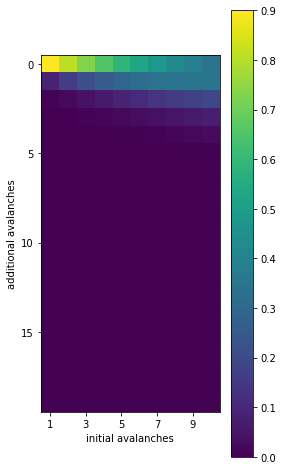

In [7]:
plt.matshow(P)
plt.colorbar();
ax = plt.gca()
ax.xaxis.set_ticks_position('bottom');
plt.xticks(np.arange(0, 10, 2), np.arange(0, 10, 2)+1);
plt.xlabel('initial avalanches')
plt.ylabel('additional avalanches');

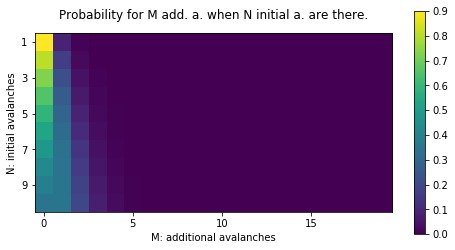

In [8]:
p = 0.1
P = np.zeros((10, 20))
for i in range(1, 11):
    for a in range(20):
        P[i-1, a] = model(initial=i, additional=a, p=p)
plt.matshow(
    P, 
    #norm=LogNorm(),
)
plt.colorbar();
ax = plt.gca()
ax.xaxis.set_ticks_position('bottom');
plt.yticks(np.arange(0, 10, 2), np.arange(0, 10, 2)+1);
plt.ylabel('N: initial avalanches')
plt.xlabel('M: additional avalanches');
plt.title("Probability for M add. a. when N initial a. are there.");


In [9]:
# normalization ? 
P.sum(axis=1)
# yepp ... still good

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [10]:
P.shape

(10, 20)

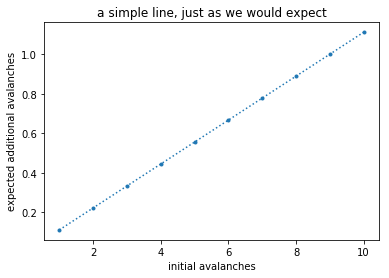

In [11]:
# expectation values
expectation = (P * np.arange(20)).sum(axis=1)
plt.plot(
    np.arange(10)+1,
    expectation,
    '.:',
)
plt.xlabel('initial avalanches')
plt.ylabel('expected additional avalanches');
plt.title("a simple line, just as we would expect");

Now we can try to write down the probability to observe K avalanches, without knowing how many where initial and how many where additional.

I want to do it like this
\begin{eqnarray}
P_{\mu,p}(K) &=& \sum_{i=0}^K P_\mu(i) \cdot P_p(K-i|i) \\
 &=& \sum_{i=0}^K \frac{\mu^i}{i!} e^{-\mu} \cdot \binom{K-1}{K-i} p^{K-i} (1-p)^i
\end{eqnarray}

for $K=0$ we have a special case of initial $i=0$ and observed $K=0$. we want to argue, the probability to see zero additional avalanches in case of zero initial avalanches is 1. The probability to see more than zero additional avalanches in case of zero initial avalanches is exactly zero. 
We build this as a special case in to the model:

In [12]:
from scipy.special import binom
def model(initial, additional, p=0.1):
        N = initial
        M = additional
        #print('MODEL', M, N)
        if N==0 and M==0:
            return 1
        if N==0 and M!=0:
            return 0

        return binom((M+N-1), M) * p**M * (1-p)**N

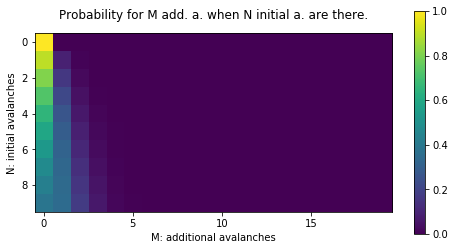

In [13]:
p = 0.1
P = np.zeros((10, 20))
for i in range(10):
    for a in range(20):
        P[i, a] = model(initial=i, additional=a, p=p)
plt.matshow(
    P, 
    #norm=LogNorm(),
)
plt.colorbar();
ax = plt.gca()
ax.xaxis.set_ticks_position('bottom')
plt.ylabel('N: initial avalanches')
plt.xlabel('M: additional avalanches')
plt.title("Probability for M add. a. when N initial a. are there.");

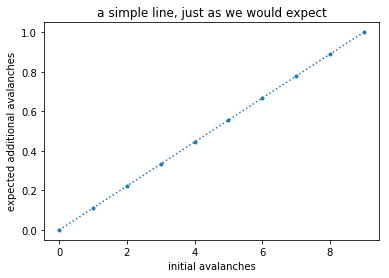

In [14]:
# expectation values
expectation = (P * np.arange(20)).sum(axis=1)
plt.plot(
    np.arange(10),
    expectation,
    '.:',
)
plt.xlabel('initial avalanches')
plt.ylabel('expected additional avalanches');
plt.title("a simple line, just as we would expect");

In [15]:
from scipy.special import factorial

In [16]:
def poisson(N, mu=0.07):
    return mu**N / factorial(N) * np.exp(-mu)

def proba_for_K(K, mu=0.07, p=0.1):
    s = 0
    for i in range(K+1):
        poiss = poisson(N=i, mu=mu)
        mod = model(initial=i, additional=K-i, p=p)
        #print('initial:', i, 'possion', poiss, 'model:', mod)
        s +=  poiss * mod 
    return s

In [17]:
max_K = 50
for mu in np.linspace(0.05, 0.10, 5):
    print('mu:{mu:.2f}'.format(mu=mu))
    for p in np.linspace(0.05, 0.2, 5):
        s = 0
        for k in range(max_K):
            P = proba_for_K(K=k, mu=mu, p=p)
            s += P
            #print(k, P, s)
        print('  p:{p:.2f}, S:{S:.2f}'.format(
            mu=mu,
            p=p,
            S=s
        ))


mu:0.05
  p:0.05, S:1.00
  p:0.09, S:1.00
  p:0.12, S:1.00
  p:0.16, S:1.00
  p:0.20, S:1.00
mu:0.06
  p:0.05, S:1.00
  p:0.09, S:1.00
  p:0.12, S:1.00
  p:0.16, S:1.00
  p:0.20, S:1.00
mu:0.08
  p:0.05, S:1.00
  p:0.09, S:1.00
  p:0.12, S:1.00
  p:0.16, S:1.00
  p:0.20, S:1.00
mu:0.09
  p:0.05, S:1.00
  p:0.09, S:1.00
  p:0.12, S:1.00
  p:0.16, S:1.00
  p:0.20, S:1.00
mu:0.10
  p:0.05, S:1.00
  p:0.09, S:1.00
  p:0.12, S:1.00
  p:0.16, S:1.00
  p:0.20, S:1.00


(1.0, 0.06760618009405177, 0.008865369439977034)

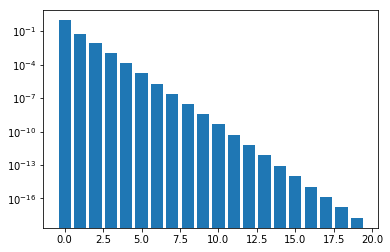

In [18]:
ks = np.arange(20)
mu = 0.07
p = 0.1
P = np.array([proba_for_K(k, mu=mu, p=p) for k in ks])
plt.bar(ks, P, log=True);

P.sum(), P[1:].sum(), P[2:].sum()

In [19]:
p_ct = P[2:].sum() / P[1:].sum()

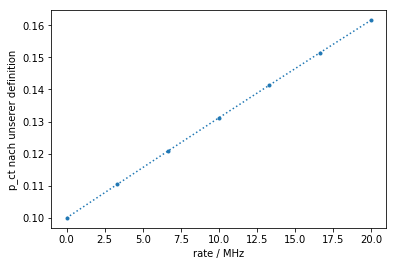

In [20]:
p_ct_s = []
rate = np.linspace(1e-10, 20, 7) * 1e6
t_window = 7e-9
mus = rate * t_window
p = 0.1
for mu in mus:
    ks = np.arange(20)
    P = np.array([proba_for_K(k, mu=mu, p=p) for k in ks])
    p_ct = P[2:].sum() / P[1:].sum()
    p_ct_s.append(p_ct)
plt.plot(rate/1e6, p_ct_s, '.:')
plt.xlabel('rate / MHz')
plt.ylabel('p_ct nach unserer definition');

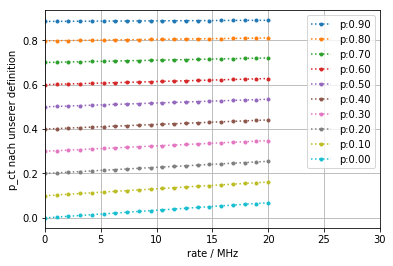

In [21]:
t_window = 7e-9
ps = np.arange(0, 1, 0.1)
for p in ps[::-1]:
    p_ct_s = []
    rate = np.linspace(1e-10, 20, 20) * 1e6
    mus = rate * t_window
    for mu in mus:
        ks = np.arange(20)
        P = np.array([proba_for_K(k, mu=mu, p=p) for k in ks])
        p_ct = P[2:].sum() / P[1:].sum()
        p_ct_s.append(p_ct)
    plt.plot(rate/1e6, p_ct_s, '.:', label='p:{0:.2f}'.format(p))
plt.xlabel('rate / MHz')
plt.ylabel('p_ct nach unserer definition');
plt.grid()
plt.xlim(0, 30)
plt.legend();

In [22]:
ks = np.arange(20)
mu = 0.07
p = 0.1
P = np.array([proba_for_K(k, mu=mu, p=p) for k in ks])

# the meaurement does not know about P[0] -->
fingerplot = P[1:]

estimated_mu = fingerplot.sum()
p_ct = fingerplot[1:].sum() / fingerplot.sum()

# now we subtract a possion from the fingerplot
possion_to_subtract = np.array([poisson(N=i, mu=estimated_mu) for i in range(1, len(fingerplot)+1)])

corrected = fingerplot - possion_to_subtract
corrected

p_ct_corrected = corrected[1:].sum() / fingerplot.sum()
p_ct, p_ct_corrected

(0.131132530008999, 0.09881503341033326)

In [23]:
mu, estimated_mu

(0.07, 0.06760618009405177)

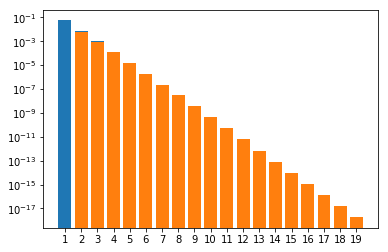

In [24]:
N = np.arange(len(fingerplot)) + 1
plt.bar(N, fingerplot, log=True);
plt.bar(N, corrected, log=True);
plt.xticks(N, N);

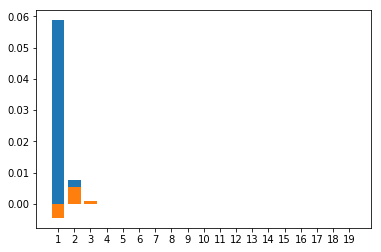

In [25]:
plt.bar(N, fingerplot);
plt.bar(N, corrected);
plt.xticks(N, N);

There is a different definition for p_ct

p_ct is (predicted singles - measured singles) /  predicted singles

Now let's try this one... how does it look

In [26]:
p_ct_alternative = (possion_to_subtract[0] - fingerplot[0]) / possion_to_subtract[0]
p_ct_alternative

0.07036058506313334

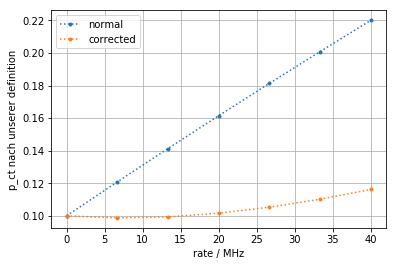

In [27]:
p_ct_s = []
p_ct_s_corrected = []

rate = np.linspace(1e-10, 40, 7) * 1e6
t_window = 7e-9
mus = rate * t_window
p = 0.1
for mu in mus:
    ks = np.arange(20)
    P = np.array([proba_for_K(k, mu=mu, p=p) for k in ks])
    
    fingerplot = P[1:]

    estimated_mu = fingerplot.sum()
    
    p_ct = fingerplot[1:].sum() / fingerplot.sum()

    # now we subtract a possion from the fingerplot
    possion_to_subtract = np.array([poisson(N=i, mu=estimated_mu) for i in range(1, len(fingerplot)+1)])

    corrected = fingerplot - possion_to_subtract
    corrected

    p_ct_corrected = corrected[1:].sum() / fingerplot.sum()
    
    p_ct_s.append(p_ct)
    p_ct_s_corrected.append(p_ct_corrected)
plt.plot(rate/1e6, p_ct_s, '.:', label='normal')
plt.plot(rate/1e6, p_ct_s_corrected, '.:', label='corrected')
plt.xlabel('rate / MHz')
plt.ylabel('p_ct nach unserer definition');
plt.grid()
plt.legend();